# Individual Planning Report: Chelsea Dela Cruz (45705464)
# Dataset Overview
The dataset consists of two files from a Minecraft research server: `players.csv` (196 observations, 7 variables) containing player demographics, and `sessions.csv` (1,535 observations, 5 variables) containing session records. For this analysis focusing on player characteristics, I will primarily use `players.csv`.
| Variable | Type | Description |
| -------- | ---- | ----------- |
| `experience` | Categorical | Self-reported experience level |
| `subscribe` | Boolean | Newletter subscription status |
| `hashedEmail` | Categorical | Player identifier |
| `played_hours` | Quantitative | Total number of hours spent playing on server |
| `name` | Categorical | Player's chosen name |
| `gender` | Categorical | Player's self-identified gender |
| `Age` | Quantitative | Age of player |


**Potential Issues**: right-skew in `played_hours`, potential outliers in `Age`, and categorical variables requiring proper encoding.

# Questions 
**Broad Question**: Which "kinds" of players are most likely to contribute a large amount of data?

**Specific Question**: Can a player's experience level and age significantly predict their total played hours?

The `played_hours` variable directly measures data contribution, as more gameplay time generates more server data through player actions and session recordings. The `players.csv` data will quantify relationships between player characteristics (`experience` and `age`) and data contribution, identifying which factors most strongly influence data generation.

# Exploratory Data Analysis and Visualization

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("data/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
# This tidies up the data to only have the necessary variables: experience, played_hours, and Age
players_tidy <- players |>
    select(experience, played_hours, Age)
head(players_tidy)

experience,played_hours,Age
<chr>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
Amateur,0.7,21
Regular,0.1,21
Amateur,0.0,17


In [4]:
# Summary Statistics
summary(players_tidy)

ave_hrs <- players_tidy |>
    summarize(ave_hrs = mean(played_hours)) |>
    pull()
ave_hrs
ave_age <- players_tidy |>
    summarize(ave_age = mean(Age, na.rm = TRUE)) |>
    pull()
ave_age

  experience         played_hours          Age       
 Length:196         Min.   :  0.000   Min.   : 9.00  
 Class :character   1st Qu.:  0.000   1st Qu.:17.00  
 Mode  :character   Median :  0.100   Median :19.00  
                    Mean   :  5.846   Mean   :21.14  
                    3rd Qu.:  0.600   3rd Qu.:22.75  
                    Max.   :223.100   Max.   :58.00  
                                      NA's   :2      

[1] 5.845918

[1] 21.13918

## Summary Statistics

| Variable | Mean Value |
| -------- | -----------|
| `played_hours` | 5.85 |
| `Age` | 21.14 |

This means that the average number of hours played by all players is 5.85 hours and the average age of all players is 21.14.

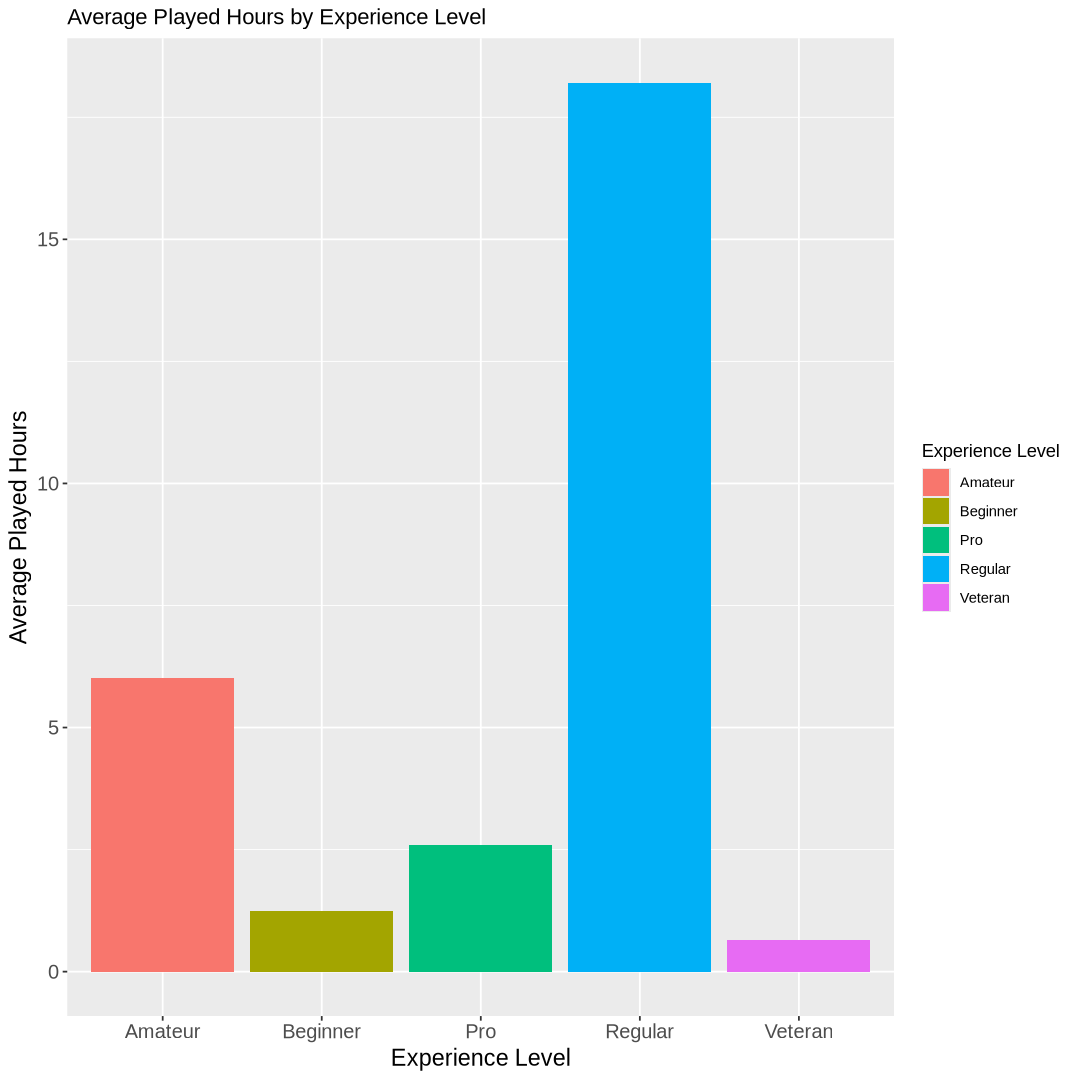

In [9]:
# experience vs played_hours
options(repr.plot.width = 9, repr.plot.height = 9)

exp_vs_hr <- players_tidy |>
    group_by(experience) |>
    summarize(ave_hrs = mean(played_hours, na.rm = TRUE)) |>
    ggplot(aes(x = experience, y = ave_hrs, fill = experience)) +
    geom_col() +
    labs(title = "Average Played Hours by Experience Level",
         x = "Experience Level", 
         y = "Average Played Hours",
         fill = "Experience Level") +
    theme(axis.title = element_text(size = 14)) +
    theme(axis.text = element_text(size = 12))
exp_vs_hr

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


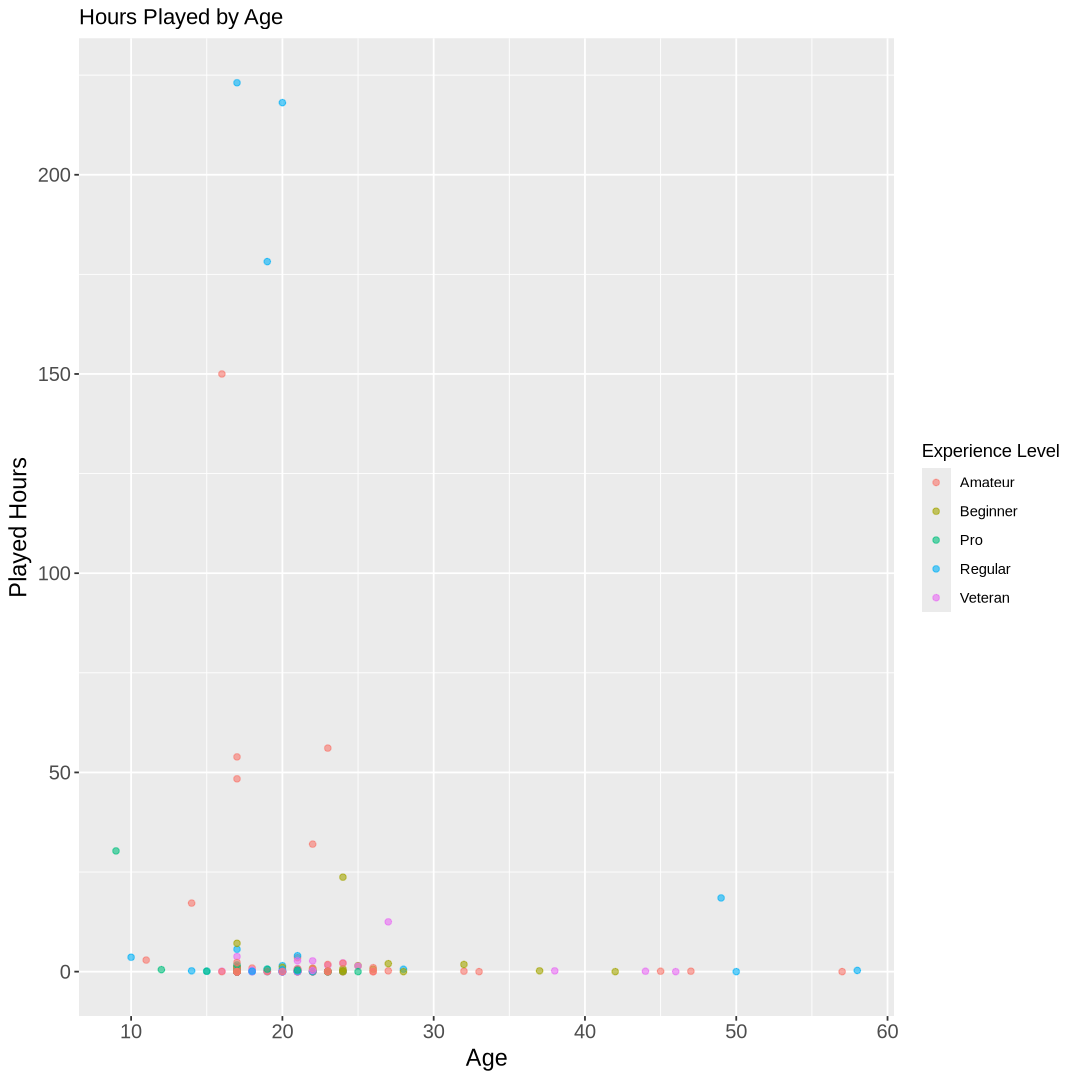

In [10]:
# age vs played_hours
options(repr.plot.width = 9, repr.plot.height = 9)
age_vs_hr <- players_tidy |>
    ggplot(aes(x = Age, y = played_hours, color = experience)) +
    geom_point(alpha = 0.6) +
    labs(title = "Hours Played by Age",
         x = "Age",
         y = "Played Hours",
         color = "Experience Level") +
    theme(axis.title = element_text(size = 14)) +
    theme(axis.text = element_text(size = 12))
age_vs_hr

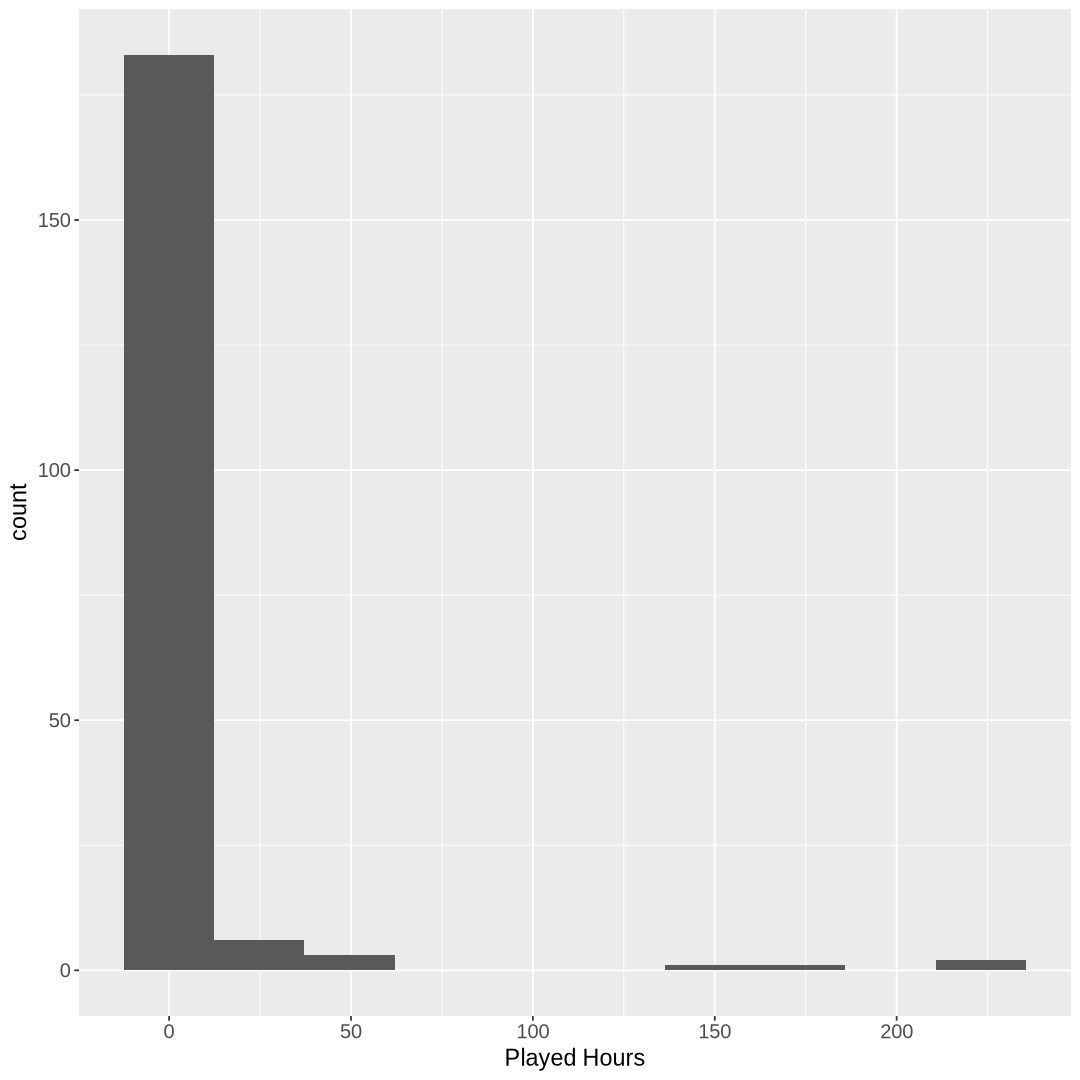

In [11]:
played_hrs_plot <- players_tidy |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(bins = 10) +
    xlab("Played Hours") +
    theme(axis.title = element_text(size = 14)) +
    theme(axis.text = element_text(size = 12))
played_hrs_plot

Visualizations show:

1. **Experience vs Played Hours**: `Regular` players have the highest average play time
2. **Age Distribution**: Similar across experience levels with moderate variability
3. **Data Skewness**: `played_hours` is right-skewed with many low-hour players and few extreme values


**Key insight**: Experience level appears more predictive of play time than age, with `Regular` players potentially being the optimal recruitment target for data contribution.

# Methods and Plan

1. **Proposed Method**: K-Nearest Neighbors (KNN) Regression

2. **Appropriateness**: Captures non-linear relationships between player characteristics and data contribution without assuming specific functional forms, aligning with the discovery that `Regular` players contribute most.

3. **Assumptions**: Meaningful distance metrics between players and appropriate feature scaling.

4. **Limitations**: Sensitive to choice of k, requires categorical variable encoding.

5. **Model Comparison**: Use 5-fold cross-validation with RMSE to select optimal k value. Compare against linear regression baseline for performance improvement.

6. **Data Processing**:
- Convert `experience` to dummy variables.
- Standardize all features (scale and center).
- 75% training, 25% testing split with stratification by `experience` level after wrangling data.
- No separate validation set due to limited sample size.

# GitHub Repository
My repository link: https://github.com/chelseadcrz/DSCI-100-Project.git